<a href="https://colab.research.google.com/github/yawpAI/colab/blob/main/ANN_regression_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [6]:
X = 6.0 * np.random.random((1000,2)) - 3.0
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
print(Y[:10])

[ 0.25387713  0.42290388 -0.09208227  0.32447825 -0.99680157  1.06372022
 -0.49646934 -1.22214985  0.22448646  1.14476846]


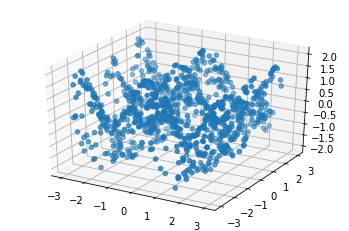

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse')

In [17]:
history = model.fit(X,Y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 1.0782
Epoch 2/200
32/32 [==============================] - 0s 876us/step - loss: 0.9232
Epoch 3/200
32/32 [==============================] - 0s 880us/step - loss: 0.8018
Epoch 4/200
32/32 [==============================] - 0s 970us/step - loss: 0.8826
Epoch 5/200
32/32 [==============================] - 0s 901us/step - loss: 0.8921
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7740
Epoch 7/200
32/32 [==============================] - 0s 920us/step - loss: 0.7221
Epoch 8/200
32/32 [==============================] - 0s 926us/step - loss: 0.7094
Epoch 9/200
32/32 [==============================] - 0s 983us/step - loss: 0.6927
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5823
Epoch 11/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5611
Epoch 12/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5735
Epoch 13/200
32/32 [===

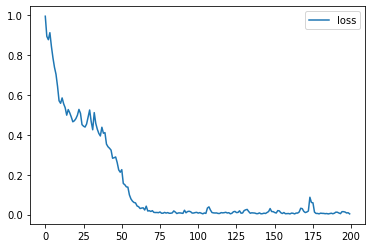

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.legend();

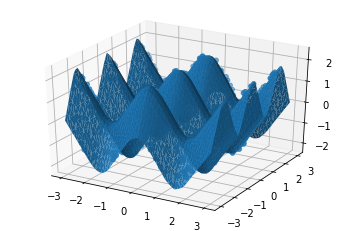

In [20]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

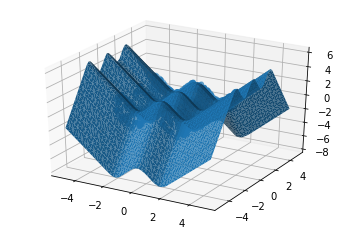

In [21]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()